In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from skimage import io,transform
#from skimage.transform import resize
from matplotlib import pyplot as plt
from PIL import Image

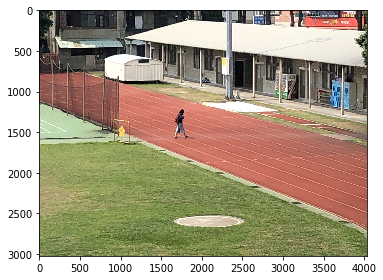

In [4]:
img =io.imread('C://Users//USER//Desktop//train//1//IMG_2950.jpg')
io.imshow(img)
io.show()

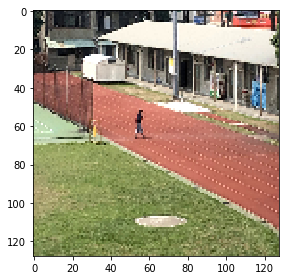

In [5]:
img2 =cv2.imread('C://Users//USER//Desktop//train//1//IMG_2950.jpg')
crop_size = (128, 128)
img2 = cv2.resize(img2, crop_size, interpolation = cv2.INTER_CUBIC)
#BGR 轉 RGB
img2 = img2[:,:,::-1]
io.imshow(img2)
io.show()

In [6]:
img.shape

(3024, 4032, 3)

In [7]:
img2.shape

(128, 128, 3)

In [8]:
def get_File(file_dir):
    # 建圖片list
    images = []
    
    # 建子資料夾list
    subfolders = []

    # Using "os.walk" function to grab all the files in each folder
    for root, dirNames, fileNames in os.walk(file_dir):
        for name in fileNames:
            images.append(os.path.join(root, name))
            
        for name in dirNames:
            subfolders.append(os.path.join(root, name))
            
    print(images)
    print(subfolders)
    # To record the labels of the image dataset
    labels = []
    count = 0
    for one_folder in subfolders:
        #每個資料夾所含有的個數 10 2
        n_img = len(os.listdir(one_folder))
        labels = np.append(labels, n_img * [count])
        count+=1
    print(labels)
    
    subfolders = np.array([images, labels])
    subfolders = subfolders.transpose()
    print(subfolders)
    image_list = list(subfolders[:, 0])
    label_list = list(subfolders[:, 1])
    label_list = [int(float(i)) for i in label_list]
    print(image_list)
    print(label_list)
    print(subfolders.shape)
    return image_list, label_list

In [9]:
# 轉Int64資料為 tf.train.Feature 格式
def int64_feature(value):
    if not isinstance(value, list):
        value = [value]
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

# 轉Bytes資料為 tf.train.Feature 格式
def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def convert_to_TFRecord(images, labels, filename):
    n_samples = len(labels)
    TFWriter = tf.python_io.TFRecordWriter(filename)

    print('\nTransform start...')
    for i in np.arange(0, n_samples):
        try:
            image = cv2.imread(images[i])
            crop_size = (128, 128)
            image = cv2.resize(image, crop_size, interpolation = cv2.INTER_CUBIC)

            if image is None:
                print('Error image:' + images[i])
            else:
                image_raw = image.tostring()

            label = int(labels[i])
            
            # 將 tf.train.Feature 合併成 tf.train.Features
            ftrs = tf.train.Features(
                    feature={'Label': int64_feature(label),
                             'image_raw': bytes_feature(image_raw)}
                   )
            
            # 將 tf.train.Features 轉成 tf.train.Example
            example = tf.train.Example(features=ftrs)
            
            # 將 tf.train.Example 寫成 tfRecord 格式
            TFWriter.write(example.SerializeToString())
        except IOError as e:
            print('Skip!\n')

    TFWriter.close()
    print('Transform done!')

In [10]:
def main():
    # 資料集的位置
    train_dataset_dir = 'C:/Users/USER/Desktop/train/'
    save_dir = 'C:/Users/USER/Desktop/tfrecord/Train.tfrecords'
    
    # 取回所有檔案路徑
    images, labels = get_File(train_dataset_dir)
    
    # 開始寫入 TRRecord 檔案
    convert_to_TFRecord(images, labels, save_dir)

if __name__ == '__main__':
    main()

['C:/Users/USER/Desktop/train/0\\IMG_3326.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3327.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3328.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3329.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3330.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3331.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3332.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3333.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3334.jpg', 'C:/Users/USER/Desktop/train/0\\IMG_3335.jpg', 'C:/Users/USER/Desktop/train/1\\IMG_2857.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2860.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2861.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2862.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2863.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2948.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2949.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2950.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2951.JPG', 'C:/Users/USER/Desktop/train/1\\IMG_2952.JPG', 'C:/Users/USER/Desktop/train/2\\IMG_2858.JPG', 'C:/Users/US